<a href="https://colab.research.google.com/github/Lizeth058/BIT_BootcampIA/blob/main/S11_C4_Intro_CNN_CF10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as no
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10 as cf10

In [2]:
(train_images, train_labels) , ( test_images, test_labels) = cf10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


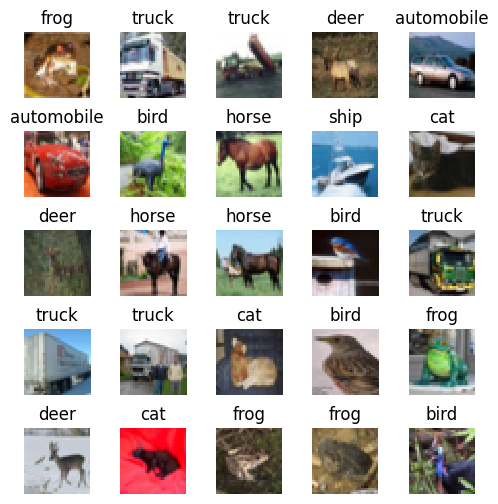

In [3]:
# initialize the label names for the CIFAR-10 dataset
class_names = ["airplane", "automobile", "bird", "cat", "deer",
	"dog", "frog", "horse", "ship", "truck"]
num_classes = len(class_names)

n_rows = 5
n_cols = 5
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(train_images[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[train_labels[index][0]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

In [4]:
import keras
print(keras.__version__)

3.7.0


In [5]:
!pip install --upgrade tensorflow keras

In [6]:
import tensorflow as tf
import keras
print(keras.__version__)

3.7.0


In [7]:

import numpy as np
import matplotlib.pyplot as plt

In [8]:

from tensorflow.keras.datasets import cifar10 as cf10

In [9]:
(train_images, train_labels) , ( test_images, test_labels) = cf10.load_data()


In [10]:
from keras.models import Sequential
from keras.layers import Dense,Flatten, Conv2D, MaxPooling2D

Experimento 1
VGG1
32 filtros de 3*3

In [11]:
model_vgg1 = Sequential()
# numero de filtros y su dimension, activacion, padding=
model_vgg1.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)))
model_vgg1.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model_vgg1.add(MaxPooling2D(pool_size=(2,2)))
# Hasta este punto en con

# en adelante montamos la RN
model_vgg1.add(Flatten())
model_vgg1.add(Dense(128, activation='relu'))
model_vgg1.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model_vgg1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,060,138 (4.04 MB)

 Trainable params: 1,060,138 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model_vgg1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
epochs = 10
batch_size = 32

train_imagen= 5000
validate =5000

train_imagen = 4500
4500/32=1406

In [14]:
model_history = model_vgg1.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.3085 - loss: 4.9657
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.5408 - loss: 1.2906
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6403 - loss: 1.0174
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7071 - loss: 0.8281
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7745 - loss: 0.6475
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8261 - loss: 0.4966
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8655 - loss: 0.3888
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8922 - loss: 0.3148
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9048 - loss: 0.2783
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9222 - loss: 0.2301


Numero de lotes = tamaño

# Datos de prueba

In [15]:
scores = model_vgg1.evaluate(test_images, test_labels, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5799 - loss: 2.5543
Test loss: 2.610975742340088
Test accuracy: 0.5760999917984009


# 2 experimento

In [16]:
model_vgg2 = Sequential()
# numero de filtros y su dimension, activacion, padding=
model_vgg2.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)))
model_vgg2.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model_vgg2.add(MaxPooling2D(pool_size=(2,2)))
# numero de filtros y su dimension, activacion, padding=
model_vgg2.add(Conv2D(64, (3,3), activation='relu', padding='same', ))
model_vgg2.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model_vgg2.add(MaxPooling2D(pool_size=(2,2)))

# en adelante montamos la RN
model_vgg2.add(Flatten())
model_vgg2.add(Dense(128, activation='relu'))
model_vgg2.add(Dense(10, activation='softmax'))

In [17]:
model_vgg2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 591,274 (2.26 MB)

 Trainable params: 591,274 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model_vgg2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
epochs = 10
batch_size = 32

In [19]:
len(train_images)

50000

In [20]:
model_history2 = model_vgg2.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.3906 - loss: 2.5147
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6183 - loss: 1.0843
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6872 - loss: 0.8954
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7363 - loss: 0.7559
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7704 - loss: 0.6524
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8147 - loss: 0.5326
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8422 - loss: 0.4476
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8736 - loss: 0.3609
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8909 - loss: 0.3111
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9023 - loss: 0.2846


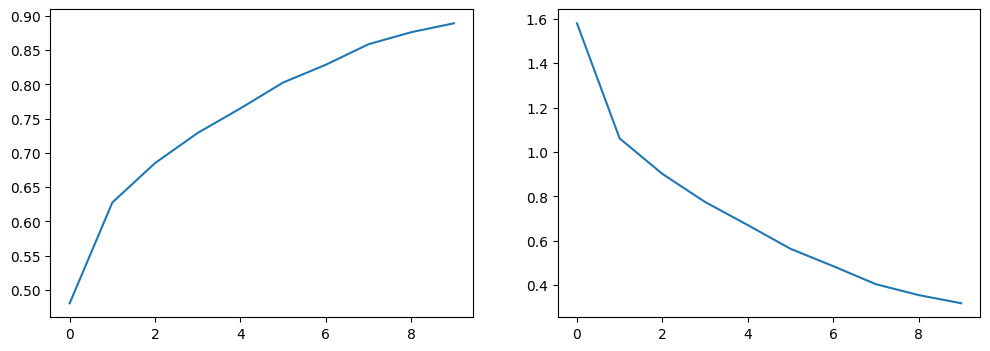

In [21]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(model_history2.history['accuracy'])
plt.subplot(1, 2, 2)
plt.plot(model_history2.history['loss'],)

In [22]:
scores = model_vgg2.evaluate(test_images, test_labels, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6702 - loss: 1.4181
Test loss: 1.405372977256775
Test accuracy: 0.6708999872207642


In [23]:
pred_imagenes = np.argmax(model_vgg2.predict(test_images), axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [24]:
import seaborn as sns

<Axes: >

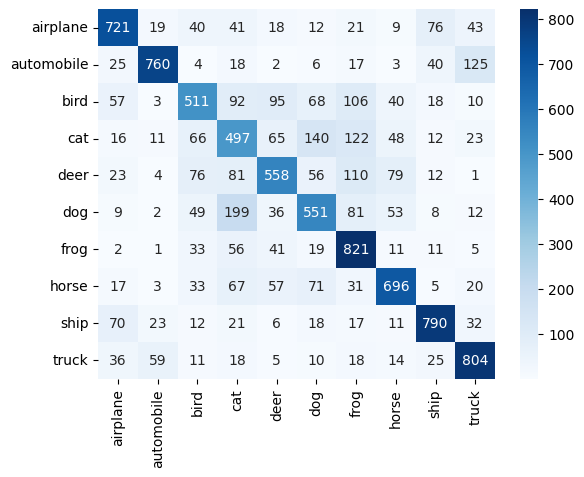

In [40]:
from sklearn.metrics import confusion_matrix, classification_report
cf_model1 = confusion_matrix(y_true=test_labels, y_pred=pred_imagenes)

sns.heatmap(cf_model1, annot=True, xticklabels=class_names, yticklabels=class_names, cmap='Blues', fmt='g')

<Axes: >

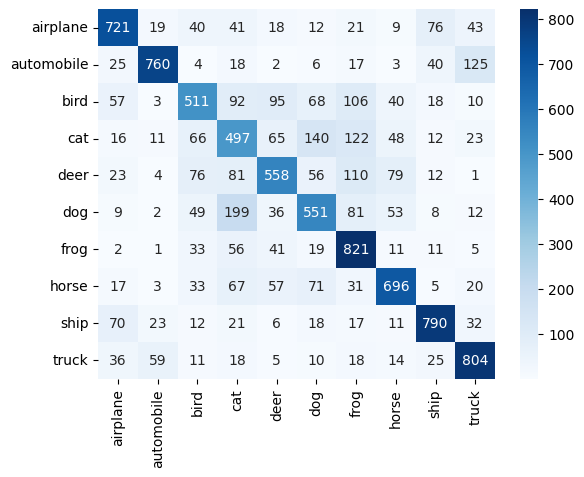

In [41]:
from sklearn.metrics import confusion_matrix, classification_report
cf_model2 = confusion_matrix(y_true=test_labels, y_pred=pred_imagenes)

sns.heatmap(cf_model2, annot=True, xticklabels=class_names, yticklabels=class_names, cmap='Blues', fmt='g')

# Guardar el modelo